In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-1m.zip


--2021-10-09 09:34:10--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  18.1MB/s    in 0.3s    

2021-10-09 09:34:11 (18.1 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

unzip:  cannot find or open ml-25m, ml-25m.zip or ml-25m.ZIP.


In [ ]:
!unzip ml-1m

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


In [ ]:

import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install "pandas<0.25.0"
import pandas as pd

In [ ]:
from pandas.compat import StringIO
with open("./ml-1m/ratings.dat",'r') as file:
  lines = file.readlines()
  data = [list(i.split("::")) for i in lines]


In [ ]:
ratings = pd.DataFrame(data,columns=['userId','movieId','rating','timestamp'])

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760\n
1,1,661,3,978302109\n
2,1,914,3,978301968\n
3,1,3408,4,978300275\n
4,1,2355,5,978824291\n


In [ ]:
with open("./ml-1m/movies.dat",'r',encoding="utf-8") as file:
  lines = file.readlines()
  data = [list(i.split("::")) for i in lines]

In [ ]:
movies  = pd.DataFrame(data,columns=['movieId','title','genre'])

In [ ]:
movies.head()

,movieId,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy\n
1,2,Jumanji (1995),Adventure|Children's|Fantasy\n
2,3,Grumpier Old Men (1995),Comedy|Romance\n
3,4,Waiting to Exhale (1995),Comedy|Drama\n
4,5,Father of the Bride Part II (1995),Comedy\n


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760\n
1,1,661,3,978302109\n
2,1,914,3,978301968\n
3,1,3408,4,978300275\n
4,1,2355,5,978824291\n


In [ ]:
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId    0
title      0
genre      0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,10,100,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,101,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,102,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,103,1030,1031,1032,1033,...,963,964,965,966,967,968,969,97,970,971,972,973,974,975,976,977,978,979,98,980,981,982,983,984,985,986,987,988,989,99,990,991,992,993,994,995,996,997,998,999
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,5,NaN,5,4,NaN,NaN,5,NaN,NaN,NaN,4,NaN,NaN,2,NaN,NaN,NaN,3,5,NaN,4,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,5,NaN,...,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,3,NaN,4,NaN,2,NaN,NaN,4,4,4,NaN,NaN,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,10,100,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,101,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,102,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,103,1030,1031,1032,1033,...,963,964,965,966,967,968,969,97,970,971,972,973,974,975,976,977,978,979,98,980,981,982,983,984,985,986,987,988,989,99,990,991,992,993,994,995,996,997,998,999
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,5,0,5,4,0,0,5,0,0,0,4,0,0,2,0,0,0,3,5,0,4,0,0,0,0,5,0,0,0,0,0,0,0,4,0,0,0,5,0,...,4,0,0,0,4,0,0,0,0,0,0,4,0,0,0,3,0,4,0,2,0,0,4,4,4,0,0,0,0,3,4,0,0,0,0,0,4,4,0,0
10,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,3,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,4,0,0,...,3,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,5,0,3,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [ ]:
no_user_voted.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: rating, dtype: float64

In [ ]:
no_movies_voted.describe()

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: rating, dtype: float64

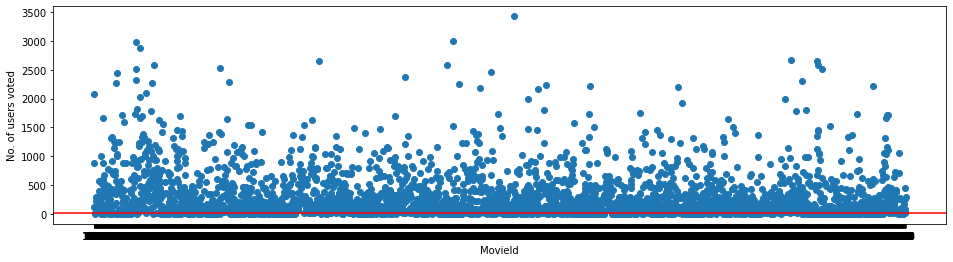

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted)
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


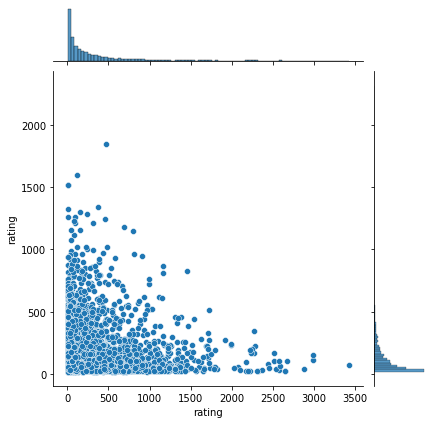

In [ ]:
sns.jointplot(no_user_voted,no_movies_voted)
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 25].index,:]

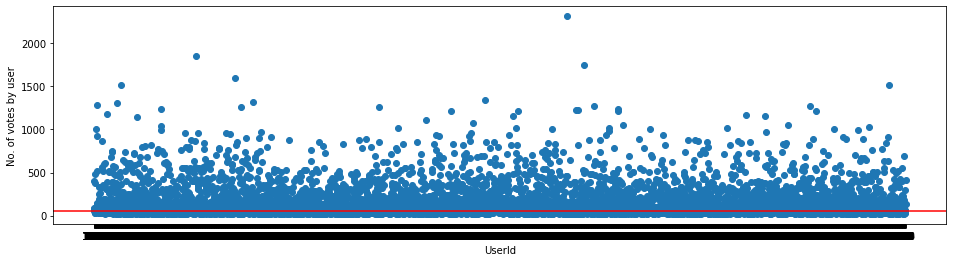

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted)
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

In [ ]:
csr_data = csr_matrix(final_dataset.values.astype(np.float))
final_dataset.reset_index(inplace=True)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name, case=False)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[1:]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation('toy story')

,Distance,Title
1,0.343299,Toy Story 2 (1999)
2,0.364949,Groundhog Day (1993)
3,0.371941,Aladdin (1992)
4,0.378671,"Bug's Life, A (1998)"
5,0.389446,Back to the Future (1985)
6,0.401017,Star Wars: Episode V - The Empire Strikes Back...
7,0.401587,Men in Black (1997)
8,0.407535,Star Wars: Episode IV - A New Hope (1977)
9,0.410764,Forrest Gump (1994)
10,0.412462,"Matrix, The (1999)"
